**Run the following two cells before you begin.**

In [186]:
%autosave 10

Autosaving every 10 seconds


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [188]:
# Import data set
df =pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [189]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [190]:
# Create features list
feats_list = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 
              'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[feats_list].values

Y = df['default payment next month'].values

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [191]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=24)
X_train,Y_train

(array([[120000,      2,      2, ...,      0,   3107,   8542],
        [190000,      1,      1, ...,  10091,  20000,  10000],
        [420000,      2,      1, ...,   3034,   3012,   5012],
        ...,
        [ 30000,      2,      1, ...,   1434,      0,   1581],
        [150000,      3,      2, ...,      0,      0,      0],
        [360000,      1,      2, ...,   2562,     13,   2989]], dtype=int64),
 array([1, 1, 0, ..., 1, 1, 0], dtype=int64))

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [192]:
min_max_sc = MinMaxScaler()
min_max_sc

MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [204]:
log_model = LogisticRegression(solver='saga',penalty='l1', max_iter=1000)
log_model


LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [205]:
from sklearn.pipeline import Pipeline

sc_pipeline = Pipeline(steps=[('scaler',min_max_sc),('model',log_model)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [206]:
# Use `get_params`
sc_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [207]:
# View what `model__C` is set to currently
type(sc_pipeline.get_params()

SyntaxError: unexpected EOF while parsing (<ipython-input-207-9b8b20b11ef8>, line 2)

In [208]:
sc_pipeline.get_params()['model__C']

1.0

In [209]:
# Change `model__C` to 2
sc_pipeline.set_params(model__C=2)

sc_pipeline.get_params()['model__C']

2

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [220]:
c_val_exponents = np.linspace(2,-3,6)
c_val = np.float(10)**c_val_exponents
c_val

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [211]:
k_folds = StratifiedKFold(n_splits=4,random_state = 1)

e:\Github\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [212]:
X,Y


(array([[ 20000,      2,      1, ...,      0,      0,      0],
        [120000,      2,      2, ...,   1000,      0,   2000],
        [ 90000,      2,      2, ...,   1000,   1000,   5000],
        ...,
        [ 30000,      2,      2, ...,   4200,   2000,   3100],
        [ 80000,      3,      1, ...,   1926,  52964,   1804],
        [ 50000,      2,      1, ...,   1000,   1000,   1000]], dtype=int64),
 array([1, 1, 0, ..., 1, 1, 1], dtype=int64))

In [217]:
def cross_val_C_search_pipe(k_folds,c_val,pipeline,X,Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds,len(c_val)))
    cv_test_roc_auc = np.empty((n_folds,len(c_val)))
    cv_test_roc = [[]]* len(c_val)
    for c_val_counter in range(len(c_val)):
        pipeline.set_params(model__C = c_val[c_val_counter])
        fold_counter = 0
        for train_index, test_index in k_folds.split(X, Y):
             #Subset the features and response, for training and testing data for
             #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]
            
            # fitiing the pipeline
            pipeline.fit( X_cv_train, y_cv_train)
            
            #getting train ROC AUC
            y_cv_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter,c_val_counter]= \
            roc_auc_score(y_cv_train,y_cv_predict_proba[:,1])
            
            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
            
             #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
            
            #Increment the fold counter
            fold_counter += 1
            
             #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc
    

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [225]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, c_val, sc_pipeline, X_train, Y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

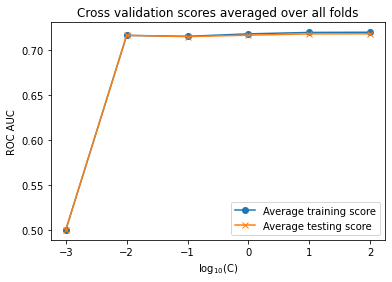

In [227]:
plt.plot(c_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(c_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [233]:
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = make_interactions.fit_transform(X)

array([[2.00000000e+04, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20000000e+05, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+06, 0.00000000e+00],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+06, 5.00000000e+06, 5.00000000e+06],
       ...,
       [3.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        8.40000000e+06, 1.30200000e+07, 6.20000000e+06],
       [8.00000000e+04, 3.00000000e+00, 1.00000000e+00, ...,
        1.02008664e+08, 3.47450400e+06, 9.55470560e+07],
       [5.00000000e+04, 2.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+06, 1.00000000e+06, 1.00000000e+06]])

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [234]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
X_train, X_test, Y_train, Y_test = train_test_split(
X_interact, Y,
test_size=0.2, random_state=24)

In [237]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, c_val, sc_pipeline, X_train, Y_train)

e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Done with C = 100.0


e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Done with C = 10.0


e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
e:\Github\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation on Case Study problem')

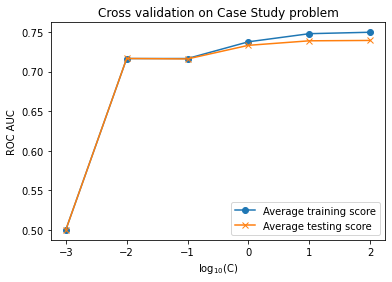

In [238]:
# Plot the average training and testing ROC AUC across folds, for each C value.
plt.plot(c_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(c_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**

In [240]:
##Yes, average cross-validation testing performance improves with interaction feature,
## yes, regularization is importent as it increases performance of our model